In [4]:
import yaml
from joblib import load
import statistics
import matplotlib.pyplot as plt

with open('translation_lls_1.pkl', 'rb') as file:
    data = load(file, mmap_mode='r')

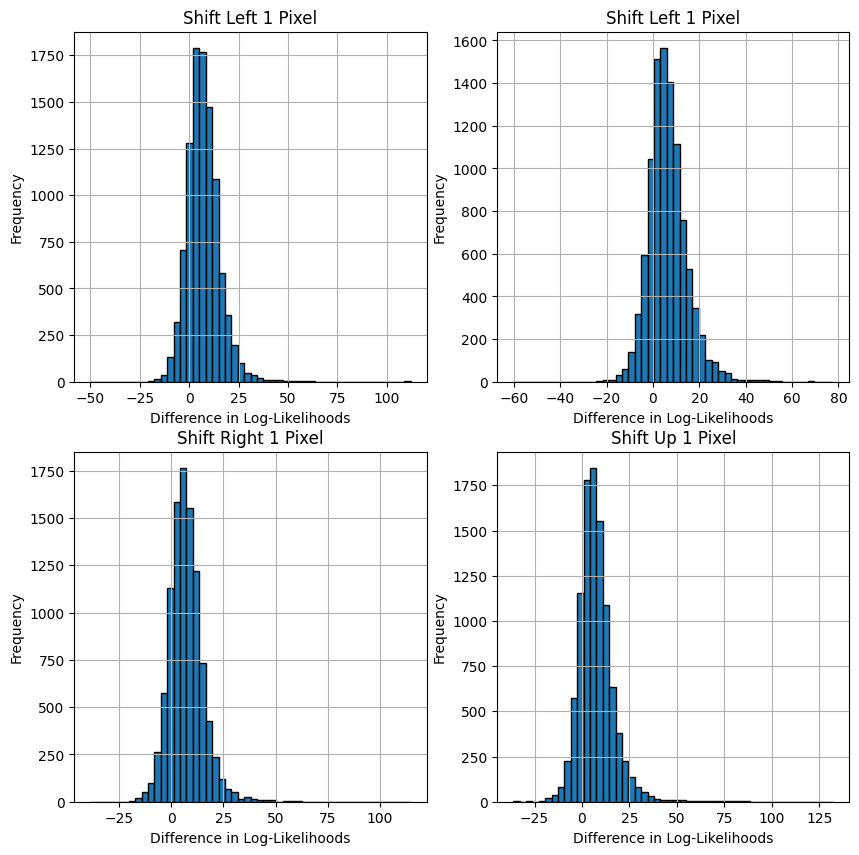

In [5]:
translations = [(1,0,0,0), (0,1,0,0), (0,0,1,0), (0,0,0,1)]
translations_dic = {translation: None for translation in translations}
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, translation in enumerate(translations):
    values = [tensor.item() for tensor in data[translation]]
    translations_dic[translation] = {'mean': statistics.mean(values), 
                                     'absolute mean': sum([abs(x) for x in values])/len(values), 
                                     'std dev': statistics.stdev(values)}
    ax = axes[i // 2, i % 2]
    ax.hist(values, bins=50, edgecolor='black')
    ax.set_xlabel('Difference in Log-Likelihoods')
    ax.set_ylabel('Frequency')
    if i == 0:
        ax.set_title(f'Shift Left 1 Pixel')
    elif i == 1:
        ax.set_title(f'Shift Left 1 Pixel')
    elif i == 2:
        ax.set_title(f'Shift Right 1 Pixel')
    else:
        ax.set_title(f'Shift Up 1 Pixel')
    ax.grid(True)

In [6]:
with open('statistics_1.yaml', 'w') as file:
    yaml.dump(translations_dic, file)

In [7]:
translations_dic

{(1, 0, 0, 0): {'mean': 7.100044464302063,
  'absolute mean': 8.356958743095397,
  'std dev': 8.270882027242148},
 (0, 1, 0, 0): {'mean': 6.30418863697052,
  'absolute mean': 7.8779298082351685,
  'std dev': 8.341857723789987},
 (0, 0, 1, 0): {'mean': 7.130414005279541,
  'absolute mean': 8.333035722351074,
  'std dev': 8.206792528922767},
 (0, 0, 0, 1): {'mean': 7.293648281669617,
  'absolute mean': 8.679358707618713,
  'std dev': 9.469190402032075}}